 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 5. Machine Learning Basis**
# Section 6. Classification Problem

### _Objective_
1. 분류 문제를 풀기 위해서, 기본적인 확률에 대해서 배워봅니다. <br>
2. Logistic 함수에 대해 배워봅니다. <br>
3. 확률 분포의 차이를 구하는 Cross-Entropy에 대해 배워봅니다.
  
╚═════════════════════════════════════════╝

In [25]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 예제 데이터 ) 암 환자 데이터 셋

In [26]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

--2019-03-28 13:55:09--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.0
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2958 (2.9K) [text/csv]
Saving to: ‘cancer_dataset.csv.3’

cancer_dataset.csv. 100%[===================>]   2.89K  --.-KB/s    in 0s      

2019-03-28 13:55:09 (47.8 MB/s) - ‘cancer_dataset.csv.3’ saved [2958/2958]



### 데이터 시각화

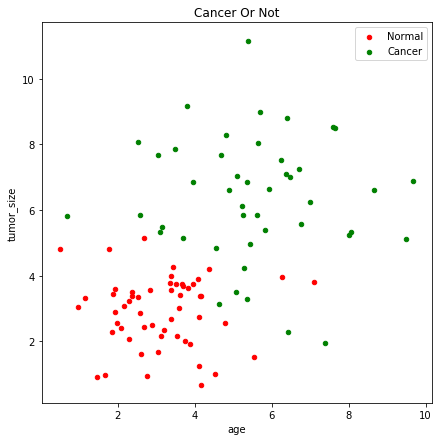

In [27]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(['Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

<br><br>

# \[ 1. Logistic 함수 유도하기 \]

----

----

> *분류 문제는 회귀 문제와 달리, 확률로 결과값을 표현해야 합니다. *<br>
> *실수의 값을 확률의 값으로 바꾸어주는 함수로 Logistic이 존재합니다.*

## 1. 확률의 정의

----

분류 문제를 풀기 위해서는, 결과 값의 형태가 **확률(Probability)** 로 나타나야 합니다. <br>
확률은 사건(부분집합)을 입력하면 숫자(확률값)으로 출력되는 함수입니다.<br>

확률의 세가지 공리 (콜모고로프의 공리)
1. 모든 사건에 대해 확률은 실수이고 0 또는 양수이다. 
$$
P(A) >= 0
$$
2. 표본공간(전체집합)이라는 사건(부분집합)에 대한 확률은 1이다.
$$
P(\Omega) = 1
$$
3. 공통 원소가 없는 두 사건의 합집합의 확률은 각각의 사건의 확률의 합이다.
$$
A \cap B = \emptyset \rightarrow P(A\cup B) = P(A) + P(B)
$$


확률로 하게 되면, 우리는 결과를 **해석**할 수 있게 됩니다.<br>

## 2. Odds Ratio

----
Odds Ratio란, 해당 사건이 일어날 확률과 일어나지 않을 확률의 비율입니다.
$$
\mbox{일어날 확률} = P(x) \\
\mbox{일어나지 않을 확률} = 1-P(x) \\
\mbox{Odds Ratio} = \frac{\mbox{일어날 확률}}{\mbox{일어나지 않을 확률}} = \frac{P(x)}{1-P(x)}
$$


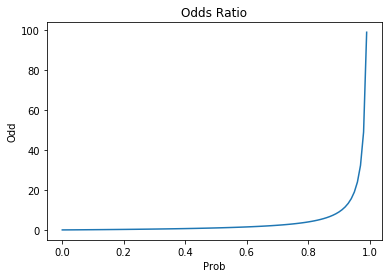

In [28]:
probs = np.arange(0,1,0.01)
odds = np.array([prob/(1-prob) for prob in probs])

plt.plot(probs, odds)
plt.title("Odds Ratio")
plt.xlabel('Prob')
plt.ylabel('Odd')
plt.show()

Odds Ratio도 확률의 의미를 가지고 있습니다. <br>
Odds의 값이 클수록, 확률이 커지는 관계에 있습니다.<br>
하지만 확률과 달리<br>
그 값의 범위가 $(0,\infty )$입니다.

## 3. Logit Function

----
Logit Function은 Odds Ratio에 Log를 씌운 함수입니다.
$$
\mbox{logit(x)} = Z = log_e(\frac{P(x)}{1-P(x)})
$$


In [29]:
probs = np.arange(0,1,0.001)
logits = np.array([np.log(prob/(1-prob)) for prob in probs])

/Users/ksj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


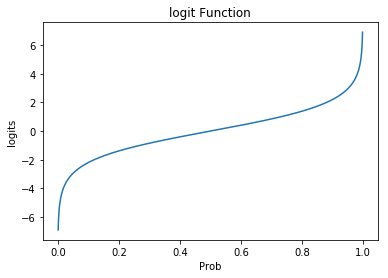

In [30]:
plt.plot(probs, logits)
plt.title("logit Function")
plt.xlabel('Prob')
plt.ylabel('logits')
plt.show()

Logit 함수는 출력 값의 범위가 실수 전체를 지칭하게 됩니다. <br>
Logit 함수는 확률 공간 $(0,1)$의 공간을 입력 공간으로 받고 <br>
실수 공간$(-\infty,\infty)$의 공간을 출력 공간으로 가집니다.

## 4. Logistic(Sigmoid) Function

----
Logistic 함수는 Logit 함수의 역함수 입니다.<br>
아래는 유도과정입니다.<br>

$
\begin{align}
\mbox{z} = log_e(\frac{y}{1-y}) \\
\mbox{z} = - log_e(\frac{1}{y}-1) \\
\mbox{z} = - log_e(\frac{1}{y}-1) \\
e^{-z} = \frac{1}{y}-1  \\
y(e^{-z}+1) = 1 \\
y = \frac{1}{1+e^{-z}} \\
logistic(z) = \frac{1}{1+e^{-z}}
\end{align}
$


이렇게 유도된 Logistic 함수는 입력 값으로 실수 전체의 공간을 받아<br>
확률 공간(0,1)로 매칭시키는 함수입니다.

In [31]:
real_values = np.linspace(-10,10,100)
logistics = np.array([1/(1+np.exp(-value)) for value in real_values])

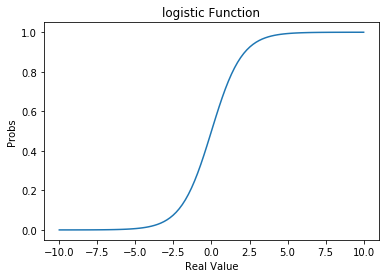

In [32]:
plt.plot(real_values, logistics)
plt.title("logistic Function")
plt.xlabel('Real Value')
plt.ylabel('Probs')
plt.show()

로지스틱 함수는 수학적으로 도출된 함수로, 실수 값 공간을 확률공간으로 변환할 때<br>
주로 쓰입니다.

<br><br>

# \[ 2. Cross Entropy 유도하기 \]

----

----

> *분류 문제의 오차는 실제값의 확률(0,1)과 예측값의 확률(0,1)의 차이입니다.*<br>
> *확률 간의 차이를 구하는 Cross Entropy에 대해 배워봅니다.*


reference :
1. [wiki - 정보 엔트로피](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC)
2. [A short Introduction to Entropy, Cross-Entropy and KL-Divergence](https://www.youtube.com/watch?v=ErfnhcEV1O8)

## 1. Entropy

----

정보 이론에서는 모든 정보를 **확률(P)**로서 표현합니다.<br>

### (1) 정보의 크기

단일 정보의 중요도는 확률(P)이 낮을수록, 커지게 됩니다. <br>
정보의 중요도는 $-log(P)$로 나타내게 됩니다.

$$
\mbox{정보의 중요도} : h(x) = -logp(x) 
$$

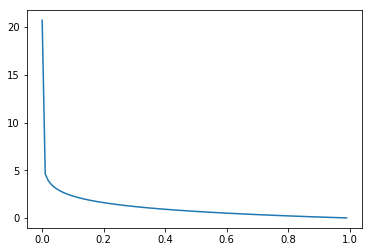

In [33]:
real_values = np.arange(1e-9,1,0.01)
informations = -np.log(real_values)
plt.plot(real_values,informations)
plt.show()

예를 들어 날씨가 자주 나빠지는 영국을 기준으로 바라보면

|    | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.1 | 0.9 |
|중요도|$$-log(0.1)$$|$$-log(0.9)$$|

In [34]:
print("오늘 아침 맑다는 정보의 가치  : ",-np.log(0.1))
print("오늘 아침 흐리다는 정보의 가치 : ",-np.log(0.9))

오늘 아침 맑다는 정보의 가치  :  2.3025850929940455
오늘 아침 흐리다는 정보의 가치 :  0.10536051565782628


가 됩니다. 즉 희소하게 발생하는 정보일수록, 그 정보의 중요도는 커집니다.

정보의 중요도를 아래와 같이 구성하면 3가지 성질이 생깁니다.
$$
\mbox{정보의 중요도} : h(x) = -logp(x) 
$$

1. 발생 가능성이 큰 사건은 정보량이 적어야 한다. 극단적인 경우, 반드시 발생하는 사건에는 아무런 정보도 없어야 한다.
2. 발생 가능성이 낮은 사건은 정보량이 많아야 한다.
3. 개별 사건들의 정보량은 더할 수 있어야 한다. 예를 들어, 동전을 두 번 던져서 두 번 다 앞면이 나온 사건의 정보량은 동전을 한 번 던져서 앞면이 나온 사건의 정보량의 두 배이어야 한다.

### (2) 엔트로피

해당 사건들을 모아서 영국의 날씨 데이터라는 데이터가 얼마나 중요한지를 계산해볼 수 있습니다.<br>
Entropy란, 정보의 기댓값을 의미합니다.<br>
기댓값이란, 발생 확률과 그 크기의 곱의 평균으로 아래와 같이 정의됩니다.

$$
\mbox{entropy} : H[x] = -\sum_{x}p(x)logp(x)
$$

위의 영국 날씨를 기준으로 엔트로피를 계산 해보면, 

|    | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.1 | 0.9 |
|중요도|$$-log(0.1)$$|$$-log(0.9)$$|

In [35]:
entropy = (-0.1*np.log(0.1)) + (-0.9*np.log(0.9))
print("영국 날씨의 엔트로피 : {:.3f}".format(entropy))

영국 날씨의 엔트로피 : 0.325


태국 날씨는 영국 날씨보다 더 기상천회하게 바뀝니다.<br>
거의 확률상 반반으로 날씨가 맑거나, 흐립니다.<br>
태국 날씨의 엔트로피는 어떻게 될까요?

|    | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.5 | 0.5 |
|중요도|$$-log(0.5)$$|$$-log(0.5)$$|

In [36]:
entropy = (-0.5*np.log(0.5)) + (-0.5*np.log(0.5))
print("태국 날씨의 엔트로피 : {:.3f}".format(entropy))

태국 날씨의 엔트로피 : 0.693


태국 날씨의 엔트로피가 영국 날씨의 엔트로피보다 훨씬 크다.<br>
엔트로피를 보통 **무질서의 정도**라고 설명하기도 하는데, <br>
이는 태국의 날씨와 같이 예측하기 어려울수록 <br>
엔트로피의 성질이 커지는 것을 뜻합니다.

### (2) Cross-Entropy

환자에게 암이 발병했는지에 대한 확률 분포($p(x)$)가 있다고 생각해봅시다.<br>
환자가 실제로 암이 있었다면, 실제 확률은 $p(x)=1$가 될 것이고,<br>
환자에게 암이 없었다면, 실제 확률은 $p(x)=0$이 될 것입니다.

In [37]:
sample_df = cancer_df.head(5).copy()
sample_df['p(x)'] = sample_df.label
sample_df

,age,tumor_size,label,p(x)
0,2.170865,3.087710,0.0,0.0
1,8.000731,5.237815,1.0,1.0
2,5.248661,5.851058,1.0,1.0
3,3.433496,4.278379,0.0,0.0
4,2.365321,3.508396,0.0,0.0


age와 tumor_size로 암 유무를 예측한 확률 분포($q(x)$)가 있다고 생각해봅시다.<br>
그 결과가 아래에 제공되고 있습니다.

In [38]:
sample_df['q(x)'] = [0.8,0.2,0.2,0.8,0.9]
sample_df

,age,tumor_size,label,p(x),q(x)
0,2.170865,3.087710,0.0,0.0,0.8
1,8.000731,5.237815,1.0,1.0,0.2
2,5.248661,5.851058,1.0,1.0,0.2
3,3.433496,4.278379,0.0,0.0,0.8
4,2.365321,3.508396,0.0,0.0,0.9


두 p(x)와 q(x)의 Entropy 차이는 어떻게 구해야 할까요?<br>
그 차이는 KL-Divergence 식으로 구할 수 있습니다.

$$
KL(p||q) = \sum p(x)logp(x) - p(x)logq(x)
$$

위의 경우에서 $p(x)$가 가지는 값은 0과 1뿐이므로,<br>
$p(x)logp(x)$는 항상 0이 됩니다.<br>

이것을 생략하면, 바로 Cross-Entropy의 식이 나타나게 됩니다.<br>

$$
crossentropy(p,q) = \sum -p(x)logq(x)
$$

이제 p의 값이 1일 때와 0일 때를 각각 구분지어서 보면,

$$
crossentropy(p,q) = -plogq-(1-p)log(1-q)
$$

In [39]:
cross_entropy = -(
1*np.log(0.8) + (1-0)*np.log(1-0.2) + (1-0)*np.log(1-0.2)
+ 1*np.log(0.8) + 1*np.log(0.9))
print("cross entropy 값 : {:.3f}".format(cross_entropy))

cross entropy 값 : 0.998


좀 더 성능이 좋아진 분류기를 통해, 예측을 해보았다고 하자.

In [40]:
sample_df['q2(x)'] = [0.99,0.01,0.01,0.99,0.99]
sample_df

,age,tumor_size,label,p(x),q(x),q2(x)
0,2.170865,3.087710,0.0,0.0,0.8,0.99
1,8.000731,5.237815,1.0,1.0,0.2,0.01
2,5.248661,5.851058,1.0,1.0,0.2,0.01
3,3.433496,4.278379,0.0,0.0,0.8,0.99
4,2.365321,3.508396,0.0,0.0,0.9,0.99


In [41]:
cross_entropy = -(
1*np.log(0.99) + (1-0)*np.log(1-0.01) + (1-0)*np.log(1-0.01)
+ 1*np.log(0.99) + 1*np.log(0.99))
print("cross entropy 값 : {:.3f}".format(cross_entropy))

cross entropy 값 : 0.050


cross entropy의 값은 크게 줄어든 것을 확인할 수 있습니다.<br>
분류기의 학습은 이 Cross entropy가 줄어드는 방향으로 학습을 시키면 됩니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/22

---